# Counting Time Zones in *Pure* Python (*only std lib*)

In [2]:
import json
# load the dataset
path = 'example.txt'
records = [json.loads(line) for line in open(path)]

In [4]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [5]:
# count timezones
def get_countes(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [8]:
# count timezones using collections
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int)  # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [12]:
counts = get_counts2(time_zones)
print(
    f"{counts['America/New_York']}"
    f"\n{len(time_zones)}"
)

1251
3440


In [14]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [15]:
# The same as above but using collections Counter
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

# Counting Time Zones with pandas

In [16]:
from pandas import DataFrame, Series
import pandas as pd
frame = DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [17]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [19]:
# same as above but using pandas
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [20]:
# Clean some data
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

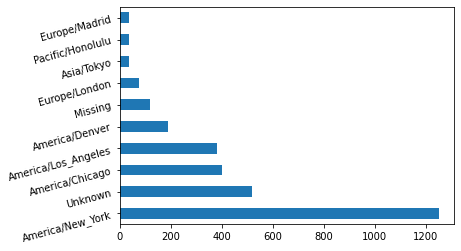

In [23]:
# Draw a horizontal bar plot from the timezones
tz_counts[:10].plot(kind='barh', rot=15)

## *'a'* field contains information about the browser, device, or application used to perform the URL shortening:

In [28]:
print(f"frame['a'][1]: {frame['a'][1]}")
results = Series([x.split()[0] for x in frame.a.dropna()])
print(results[:5])
print(results.value_counts()[:8])

frame['a'][1]: GoogleMaps/RochesterNY
0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object
Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64


In [34]:
# Try to get the Windows and non-Windows users
import numpy as np
cframe = frame[frame.a.notnull()]
# created Series from the array returned by np.where, also the book is misising import numpy as np
operating_system = Series(np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows'))
print(operating_system[:5])
by_tz_os = cframe.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
dtype: object


,Not Windows,Windows
tz,,
,180.0,316.0
Africa/Cairo,1.0,2.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,1.0,1.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,1.0,0.0
America/Anchorage,0.0,4.0
America/Argentina/Buenos_Aires,0.0,1.0
America/Argentina/Cordoba,1.0,0.0


In [35]:
# Finally, let’s select the top overall time zones. To do so, I construct an indirect index array from the row counts in agg_counts:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  21
Africa/Cairo                      51
Africa/Casablanca                 52
Africa/Ceuta                      36
Africa/Johannesburg               53
Africa/Lusaka                     34
America/Anchorage                 54
America/Argentina/Buenos_Aires    55
America/Argentina/Cordoba         56
America/Argentina/Mendoza         27
dtype: int64

In [36]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,12.0,21.0
Europe/Madrid,15.0,19.0
Pacific/Honolulu,10.0,25.0
Asia/Tokyo,14.0,23.0
Europe/London,32.0,40.0
America/Denver,56.0,125.0
America/Los_Angeles,122.0,247.0
America/Chicago,131.0,249.0
,180.0,316.0


<AxesSubplot:ylabel='tz'>

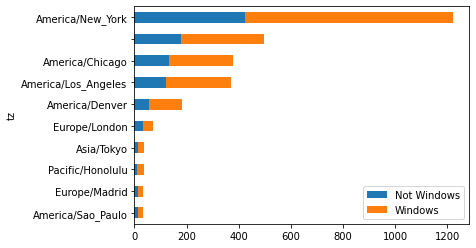

In [40]:
count_subset.plot(kind='barh', stacked=True, rot=0)

<AxesSubplot:ylabel='tz'>

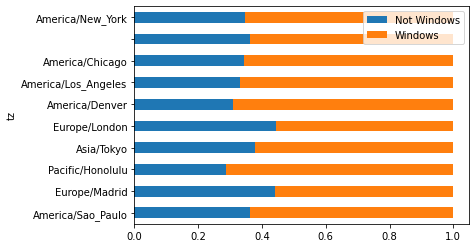

In [39]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True, rot=0)